### (1) Load and Check Data 

In [4]:
# Import libraries which are needed to analysis the titanic data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Read the raw data and check the header
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (2) Visualization 

0    549
1    342
Name: Survived, dtype: int64


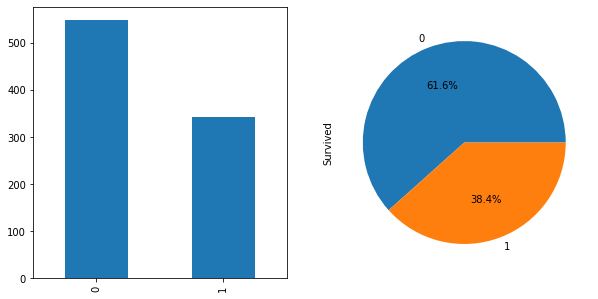

In [20]:
# Visualization by Survived
# Check dead or survived
print(titanic_df['Survived'].value_counts())

# Dead vs Survived
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)

titanic_df['Survived'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)

titanic_df['Survived'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

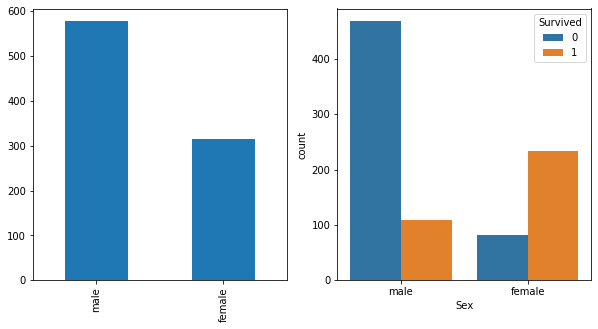

In [21]:
# Visualization by Sex
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
titanic_df['Sex'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
sns.countplot(data = titanic_df, x = 'Sex', hue = 'Survived')

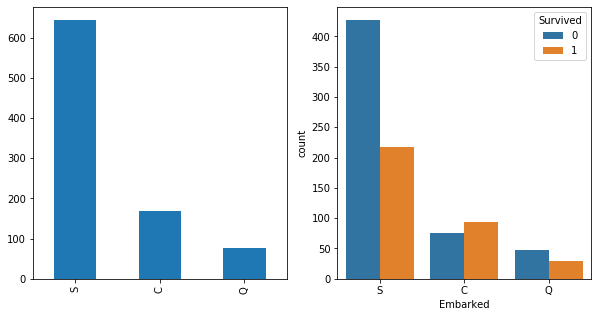

In [22]:
# Visualization by Embarked
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
titanic_df['Embarked'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
sns.countplot(data = titanic_df, x = 'Embarked', hue = 'Survived')

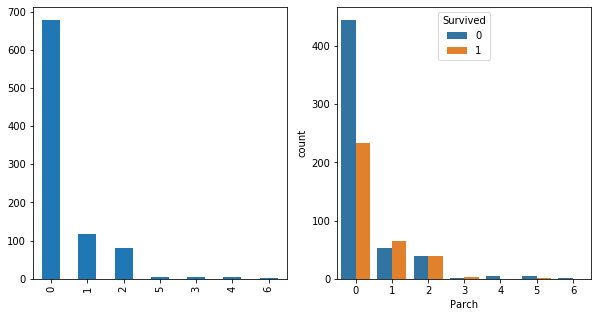

In [38]:
# Visualizatino by Parch
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
titanic_df['Parch'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
sns.countplot(data = titanic_df, x = 'Parch', hue = 'Survived')

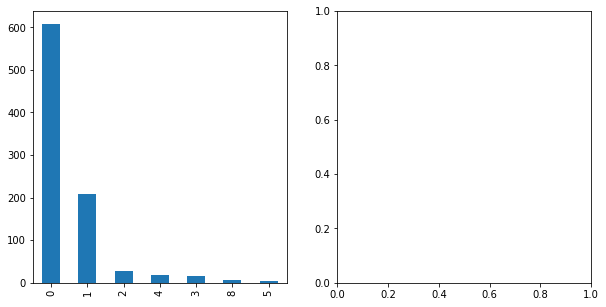

In [24]:
# Visualization by SibSp
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
titanic_df['SibSp'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
#sns.countplot(data = titanic_df, x = 'SipSp', hue = 'Survived')

### (3) Data Preprocessing - Remove Null values

In [25]:
# Check null valeus
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Fill in the Null values - Age
mean_age = titanic_df['Age'].mean()
print(mean_age)

29.69911764705882


In [28]:
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [30]:
# Fill in the Null values - Embarked
mode_em = titanic_df['Embarked'].mode()
print(mode_em)

0    S
dtype: object


In [31]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

### (4) Derived Variable

In [32]:
# Family Size
titanic_df['FamilySize'] = (titanic_df['SibSp'] + titanic_df['Parch'] + 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [33]:
# Alone
titanic_df['Alone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'Alone'] = 1
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


### (5) Feature Engineering - One Hot Encoding

In [34]:
x1 = pd.get_dummies(titanic_df['Pclass'])
x2 = pd.get_dummies(titanic_df['Sex'])
x3 = pd.get_dummies(titanic_df['Embarked'])

data = pd.concat([titanic_df, x1, x2, x3], axis = 1)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,0,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,0,0,1,0,1,0,0,1


### (6) Feature Selection

In [40]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived', 'Pclass', 'Sex', 'Embarked']
X = data.drop(drop_cols, axis = 1)
y = data['Survived']

### (7) Classification Model

In [36]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)

### (8) Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(lr, X, y, cv = 5)
print(cv)

[0.78212291 0.79329609 0.79775281 0.78089888 0.83050847]


C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

### (9) Train / Test Data Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (623, 14)
y_train: (623,)
X_test: (268, 14)
y_test: (268,)


### (10) Model Train

In [47]:
lr.fit(X_train, y_train)

C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### (11) Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8022388059701493


In [49]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

### (12) Other Models - Decision Tree, Random Forest

In [52]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

Accuracy: 0.7425373134328358


In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7873134328358209


C:\Users\Lee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### (13) Prediction for my case

In [60]:
# Age, SipSp, Parch, Fare, FamilySize, Alone, 
my = [[32, 1, 3, 100, 4, 0, 0, 1, 0, 0, 1, 1, 0, 0]]
pred = lr.predict(my)
if pred:
    print('Survived')
else:
    print('Dead')

Dead
